https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/gaussian_filter.py

In [23]:
from itertools import product
import cv2 
import numpy as np
from numpy import dot, exp, mgrid, pi, ravel, square, uint8, zeros
%matplotlib inline
from IPython.display import Image, display, Math, Latex

In [30]:
def Mascara_Gaussiana(m_size, sigma):
    center = m_size // 2
    x, y = mgrid[0 - center : m_size - center, 0 - center : m_size - center]
    g = 1 / (2 * pi * sigma) * exp(-(square(x) + square(y)) / (2 * square(sigma)))
    return g

In [36]:
def FiltroGaussiano(image, m_size, sigma):
    height, width = image.shape[0], image.shape[1]
    # dst image height and width
    dst_height = height - m_size + 1
    dst_width = width - m_size + 1

    # im2col, turn the k_size*k_size pixels into a row and np.vstack all rows
    image_array = zeros((dst_height * dst_width, m_size * m_size))
    row = 0
    for i, j in product(range(dst_height), range(dst_width)):
        window = ravel(image[i : i + m_size, j : j + m_size])
        image_array[row, :] = window
        row += 1

    #  turn the kernel into shape(k*k, 1)
    mascara = Mascara_Gaussiana(m_size, sigma)
    filter_array = ravel(mascara)

    # reshape and get the dst image
    dst = dot(image_array, filter_array).reshape(dst_height, dst_width).astype(uint8)

    return dst

In [37]:
img = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)

In [38]:
gaussian3x3 = FiltroGaussiano(img, 3, sigma=1)

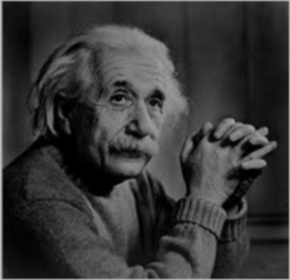

In [39]:
cv2.imwrite("gaussian3x3.jpg",gaussian3x3)
Image(filename='gaussian3x3.jpg') 